In [1]:
import numpy as np
from scipy.special import eval_genlaguerre, genlaguerre
from scipy.integrate import quad
from scipy.special import factorial, factorial2

N = 25
mu = 1
nu = 1

# Parte confrontata 
omega = 2*nu/mu

E = dict()

prefac = [np.sqrt(
            np.sqrt( 2* np.power(nu, 3)/np.pi) * \
            ( np.power(2, n+3)*factorial(n)/factorial2(2*n+1))) for n in range(N)]

def phi(r, n):
    return prefac[n]*np.exp( -nu* np.power(r, 2) ) * \
           eval_genlaguerre(n, 0.5, 2*nu*np.power(r, 2) )


def V(r):
    return -nu*omega*np.power(r,2) - np.power(r,-1)


def integrand(r, i, j):
    ret = np.power(r, 2) * V(r) * phi(r, i)  * phi(r, j)
    return ret

def norm(r, i, j):
    ret = phi(r, i) * phi(r, j) #* np.power(r, 2)
    return ret

In [2]:
omega = 2*nu/mu
print(nu, "Hamiltonian")

H = np.zeros((N,N))
for i in range(H.shape[0]):
    for j in range(i, H.shape[1]):
        int_f, err = quad(integrand, 0, 100, args=(i, j), limit=100)
        #int_n,err_n= quad(norm, 1e-5, 20, args=(i, j), limit=100)

        H[i, j] = int_f #/ int_n
        H[j, i] = H[i, j]

        if i == j:
            H[i, j] += omega*(2*i + 1.5)

E[str(nu)] = np.zeros(N)

for i in range(N, 0, -1):
    eigenvalues, eigenvectors = np.linalg.eig(H[:i, :i])
    E[str(nu)][i-1] = np.min(eigenvalues)

1 Hamiltonian


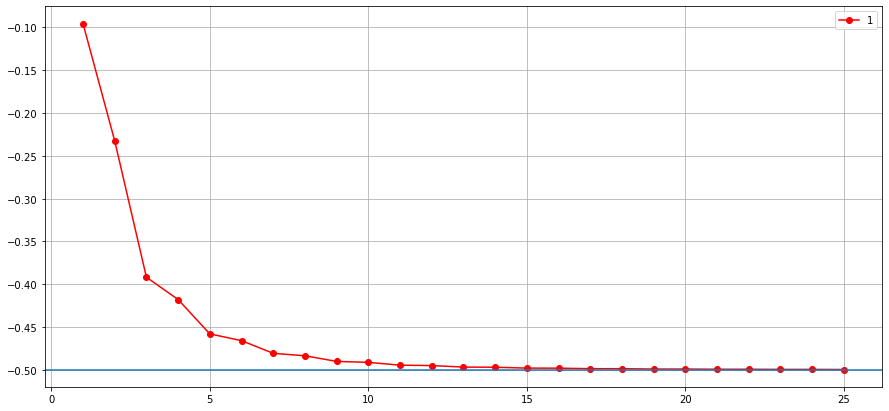

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

plt.plot(range(1, N+1), E[str(nu)], marker='o', color='red', label=str(nu));
    
plt.axhline(-0.5)
plt.legend()
plt.grid();